In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
df = pd.read_csv("input/iris.csv")
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:>

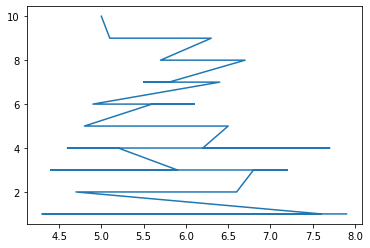

In [2]:
# df['class'].value_counts().plot(kind='bar')
# df['class'].value_counts().plot(kind='pie')
df['Sepal Length'].value_counts().plot(kind='line')

In [3]:
df2 = df[df["class"].isin(["Iris-setosa"])]  # 篩選資料
df2.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='Petal Length', ylabel='Petal Width'>

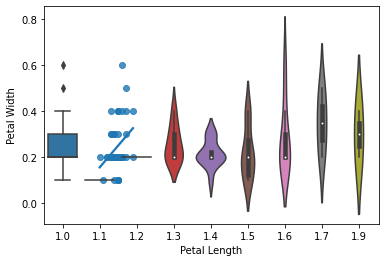

In [4]:
sns.boxplot(x=df2["class"], y=df2["Petal Width"])  #盒狀圖
sns.violinplot(x=df2["Petal Length"], y=df2["Petal Width"]) # 提琴圖
sns.regplot(x=df2["Petal Length"], y=df2["Petal Width"],ci=10) # 分佈圖

## Standardization

Standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. This method is widely used for normalization in many machine learning algorithms.

In [5]:
#Splitting the dependent and independent variables

X=df.iloc[:,:-1]
Y=df['class']
print("Shape of X is ",X.shape)
print("Shape of Y is ",Y.shape)

Shape of X is  (150, 4)
Shape of Y is  (150,)


In [6]:
X.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

## Test Train Validation

In [8]:
#Splitting the train and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0 )
print('Shape of X_train is ', X_train.shape,'X_test is ', X_test.shape)
print('Shape of Y_train is ', Y_train.shape,'Y_test is ', Y_test.shape)

Shape of X_train is  (120, 4) X_test is  (30, 4)
Shape of Y_train is  (120,) Y_test is  (30,)


In [9]:
X_train.head()
#X_test

,Sepal Length,Sepal Width,Petal Length,Petal Width
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


In [10]:
Y_train.head()
# Y_test

137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
Name: class, dtype: object

In [11]:
#Separating the validation set from train dataset

from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=0 )
print('Shape of X_train is ', X_train.shape)
print('Shape of X_valid is ', X_valid.shape)
print('Shape of Y_train is ', Y_train.shape)
print('Shape of Y_valid is ', Y_valid.shape)

Shape of X_train is  (96, 4)
Shape of X_valid is  (24, 4)
Shape of Y_train is  (96,)
Shape of Y_valid is  (24,)


In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [13]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_train_pca = pca.fit_transform(X_train_sc)
x_test_pca = pca.transform(X_test_sc)

In [14]:
#This result the variance explained by the number of components taken into account

pca.explained_variance_ratio_.cumsum()

array([0.71788758, 0.95903449])

In [15]:
x_train_pca

array([[ 0.00644432, -0.17777771],
       [-1.98621161,  0.55324288],
       [ 1.97714471,  0.87635357],
       [-2.30623934, -0.22441984],
       [ 0.27355614, -1.52064469],
       [ 1.78537896,  0.56812943],
       [ 0.15596388, -0.34055271],
       [-2.07255554,  0.76277634],
       [ 1.07058444, -0.68436849],
       [-1.96659573, -2.19031867],
       [ 0.95309006,  0.07263436],
       [ 1.53742316,  1.0249271 ],
       [-1.90458482,  1.48528476],
       [-2.28747481,  0.5818674 ],
       [ 1.53435887,  0.6475989 ],
       [ 2.79961398,  0.39785641],
       [-2.01151597, -0.50561544],
       [ 3.19731959, -0.00660003],
       [-2.19130139,  1.94146179],
       [-2.59181218, -0.3619719 ],
       [ 1.45618299, -0.87535899],
       [ 1.13615527, -1.65302171],
       [-0.13594316, -0.9817185 ],
       [-2.40574604, -0.22591612],
       [ 1.33482645,  0.97464518],
       [-2.07074272,  1.56178714],
       [ 1.70270633, -0.19327251],
       [ 0.15289959, -0.7178809 ],
       [ 2.2808652 ,

In [16]:
df=pd.DataFrame({'x_train_pca0':x_train_pca[:,0],
                 'x_train_pca1':x_train_pca[:,1],
                 'Species':Y_train})
df

,x_train_pca0,x_train_pca1,Species
88,0.006444,-0.177778,Iris-versicolor
43,-1.986212,0.553243,Iris-setosa
120,1.977145,0.876354,Iris-virginica
29,-2.306239,-0.224420,Iris-setosa
106,0.273556,-1.520645,Iris-virginica
...,...,...,...
4,-2.403825,0.745141,Iris-setosa
113,1.158288,-1.143538,Iris-virginica
67,0.070764,-0.724748,Iris-versicolor
98,-0.545354,-1.461017,Iris-versicolor


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x_train_pca0', ylabel='x_train_pca1'>

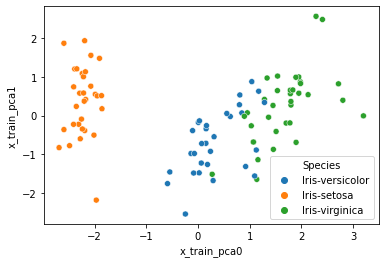

In [17]:
sns.scatterplot( df['x_train_pca0'], df['x_train_pca1'],hue=df['Species'])

## sns.load_dataset

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()
new_iris = sns.load_dataset('input/iris')
new_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:>

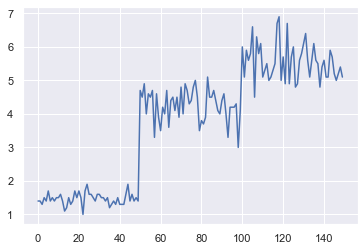

In [19]:
new_iris.petal_length.plot()

<AxesSubplot:>

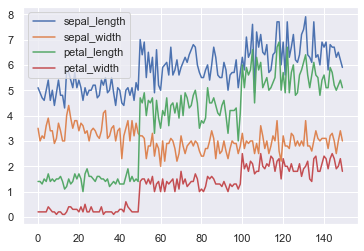

In [20]:
new_iris.plot()

In [21]:
new_d = pd.Series(np.random.rand(7), index=list('ABCDEFG'))
new_d

A    0.561046
B    0.077606
C    0.339514
D    0.312673
E    0.194530
F    0.670172
G    0.583070
dtype: float64

<AxesSubplot:>

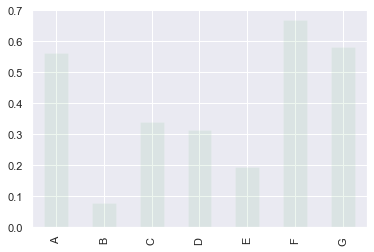

In [22]:
new_d.plot.bar(color='g', alpha=0.1)

<AxesSubplot:>

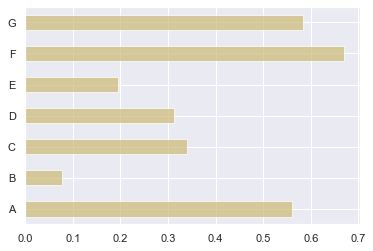

In [23]:
new_d.plot.barh(color="y", alpha=0.7)

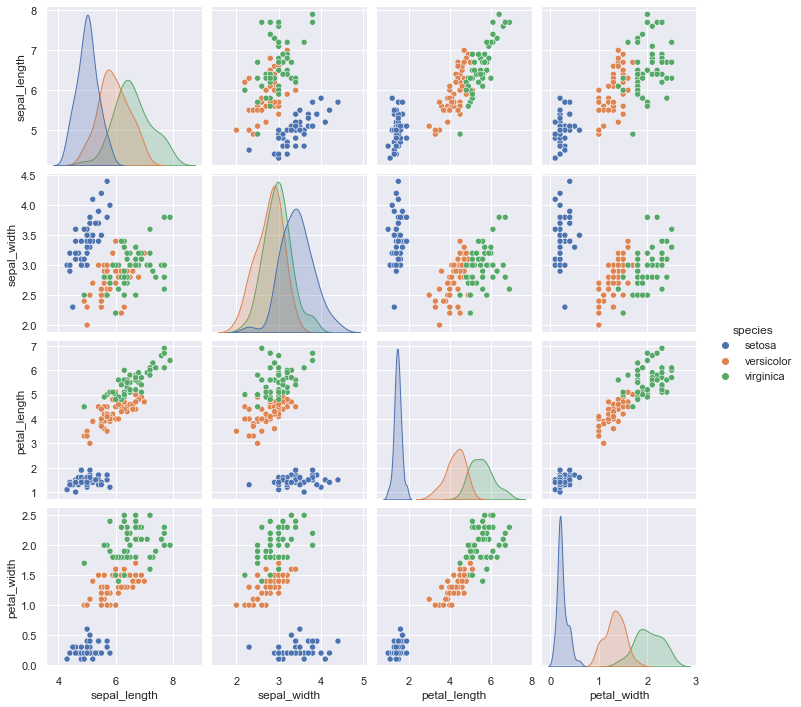

In [24]:
sns.pairplot(new_iris,hue="species",height=2.5)
#sns.pairplot(new_iris,hue="species",height=2.5,palette="Set2",diag_kind="kde")
plt.show()

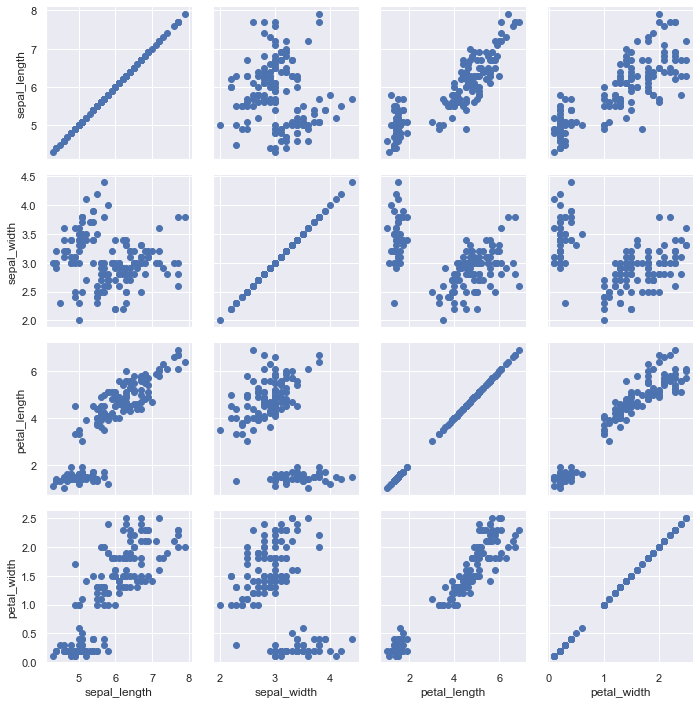

In [25]:
iris= sns.load_dataset("iris")
g=sns.PairGrid(iris)
g.map(plt.scatter)
plt.show()

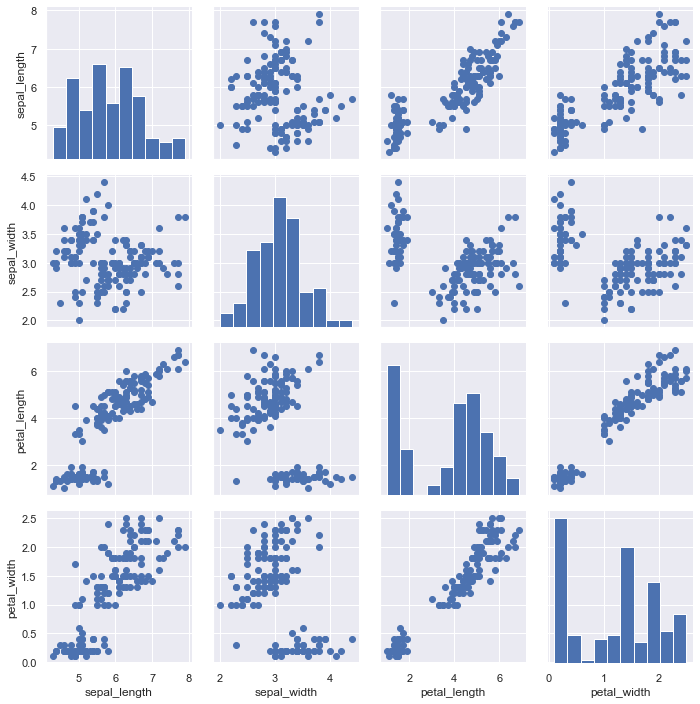

In [26]:
iris= sns.load_dataset("iris")
g=sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.show()

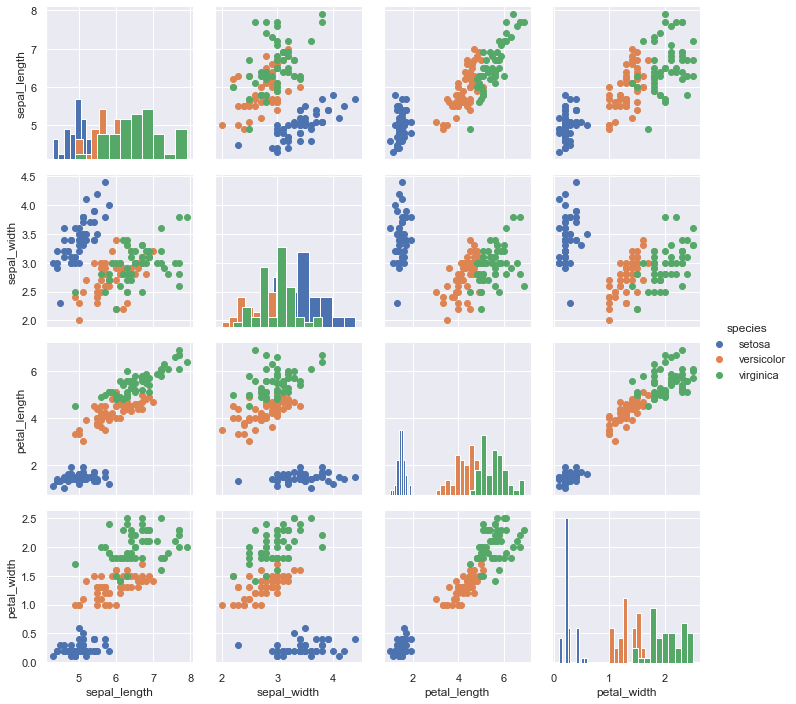

In [27]:
iris= sns.load_dataset("iris")
g=sns.PairGrid(iris,hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

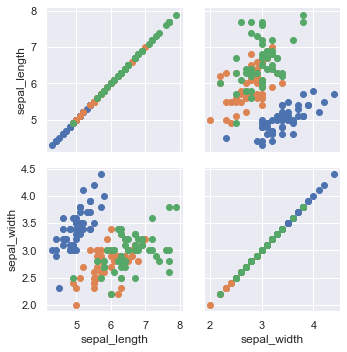

In [28]:
iris= sns.load_dataset("iris")
g=sns.PairGrid(iris,vars=["sepal_length","sepal_width"],hue="species")
g.map(plt.scatter)
plt.show()

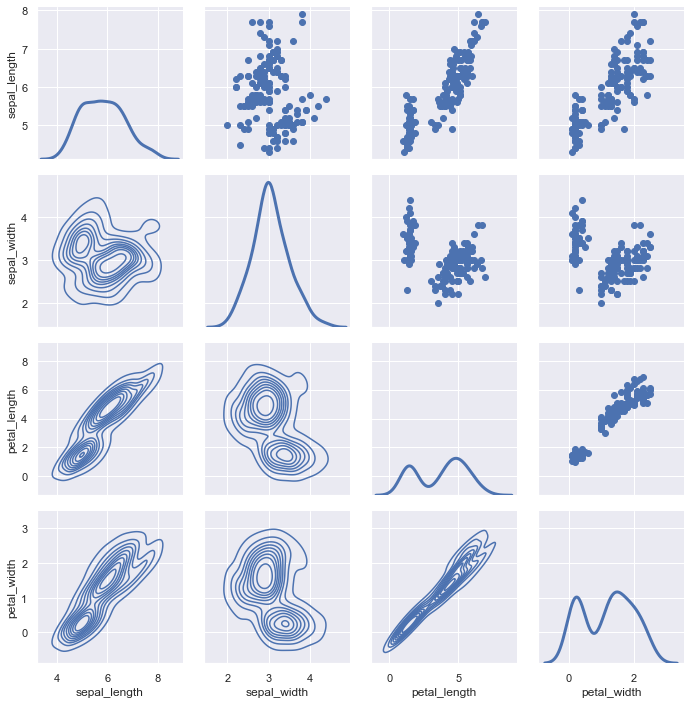

In [29]:
iris= sns.load_dataset("iris")
g=sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot,lw=3,legend=False)
plt.show()

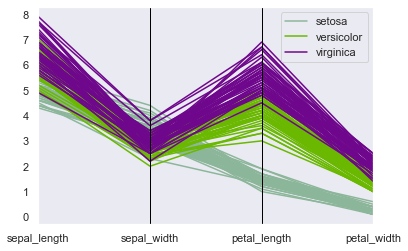

In [30]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
iris = sns.load_dataset('iris') 
parallel_coordinates(iris, 'species')
plt.show()